# Исследование закономерностей популярности видеоигр

Мы проводим исследование для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Задача нашего исследования - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Нам доступны данные до 2016 года (за 2016 год данные могут быть неполными). Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Приблизительный план нашего исследования:
- изучить доступные данные;
- провести предобработку: обработать дубликаты и пропуски, при необходимости заменить тип данных и переименовать столбцы датафрейма, добавить новые столбцы с необходимыми для исследования вычислениями;
- провести исследовательский анализ данных:
    - посмотреть, сколько игр выпускалось в разные годы.
    - посмотреть, как менялись продажи по платформам. Выберать платформы с наибольшими суммарными продажами и построить распределение по годам. Выяснить, за какой характерный срок появляются новые и исчезают старые платформы.
    - определить актуальный для исследования период и взять данные только за него.
    - посмотреть, какие платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ.
    - построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
    - посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Соотнести выводы с продажами игр на других платформах.
    - посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
- составить портрет пользователя каждого региона: определить для пользователя каждого региона (Северная Америка, Европа, Япония):
    - самые популярные платформы (топ-5).
    - самые популярные жанры (топ-5).
    - посмотреть, влияет ли рейтинг ESRB на продажи в отдельном регионе.
- проверить гипотезы:
    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Откроем файл с данными и изучим общую информацию

In [ ]:
#импортируем все необходимые для работы библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [ ]:
data = pd.read_csv('/datasets/games.csv') #считаем исходный csv-файл и запишем его в переменную data
data.head(15) #выведем первые 15 строк датафрейма на экран

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
data.info() #выведем основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:**
- мы считали cvs-файл с необходимой информацией о видеоиграх;
- вывели первые строки датафрейма и изучили, какие столбцы и какие данные в нём содержатся;
- изучили общую информацию о датафрейме и узнали, в каком формате в нём записаны данные.

## Подготовка данных

### Заменим названия столбцов (приведём их к нижнему регистру)

In [ ]:
data.columns = data.columns.str.lower() #приводим названия столбцов к нижнему регистру
data.info() #выведем обновлённую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Обработаем пропуски

In [ ]:
data.isna().sum().sort_values() #посмотрим, в каких столбцах есть пропуски, и сколько их

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

Начнём со столбца с названиями игр, посмотрим на строки с пропусками:

In [ ]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так как пропусков всего два, и эти записи не помогут нам в дальнейшем исследовании, удалим эти строки:

In [ ]:
data = data.dropna(subset=['name']) #удалим пропуски

Названия жанров игр важны для дальнейшего исследования. Мы не можем самостоятельно заполнить пропущенные значения - они категориальные. В этом столбце всего два пропуска - удалим строки с ними

In [ ]:
data = data.dropna(subset=['genre']) #удалим пропуски

Далее пропуски есть в year_of_release - год выхода. Эти данные важны для нашего исследования, но мы не можем самостоятельно заполнить пропущенные значения - они категориальные. Посмотрим, какой процент от всего датафрейма составляют строки с пропусками:

In [ ]:
(269 / 16715)*100 #считаем, какой процент от всего датафрейма составляют строки с пропусками

1.609332934489979

Также посмотрим на эти строки:

In [ ]:
data[data['year_of_release'].isna()].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


1,6% - немного, и продажи у всех этих игр небольшие, поэтому можем также удалить эти строки:

In [ ]:
data = data.dropna(subset=['year_of_release']) #удалим пропуски

Далее пропуски есть в столбцах user_score (пользовательский рейтинг) - 6701 пропуск, rating (рейтинг от организации ESRB) - 6766 пропусков и critic_score (рейтинг критиков) - 8578 пропусков. Все эти данные важны для нашего исследования. Во всех трёх столбцах пропуски составляют большую долю - от 40 до 50 процентов - так что удалить их мы не можем. Заполнить пропуски тоже не представляется возможным, так как рейтинг пользователей и критиков - субъективная оценка, и, если мы заполним все пропуски медианным значением, данные исказятся. А рейтинг от организации ESRB (то есть присвоение подходящей возрастной группы для игры) - это категориальные значения.

In [ ]:
#посмотрим на все уникальные значения в столбце с рейтингом ESRB
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Вот что означают эти маркировки:
- «E» («Everyone») — «Для всех».
- «M» («Mature») — «Для взрослых»: Для лиц старше 17 лет.
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
- «K-A» («Kids to Adults») - «Для детей и взрослых».
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет.
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.
- плюс nan - пропущенные значения.

Согласно Википедии, маркировки «K-A» и «E» означают одно и то же, поэтому мы можем объединить эти категории в одну.
Для пропусков можно создать отдельную категорию "no_rating", чтобы учитывать игры, для которых мы не знаем рейтинг.

In [ ]:
data['rating'] = data['rating'].replace('K-A', 'E') #объединяем категории «K-A» и «E»

In [ ]:
data['rating'] = data['rating'].fillna('no_rating') #заменяем пропуски на "no_rating"

In [ ]:
#снова посмотрим на уникадльные значения в столбце с рейтингом ESRB, чтобы убедиться, что замены прошли успешно
data['rating'].unique()

array(['E', 'no_rating', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Также в столбце user_score (пользовательский рейтинг) присутствует значение 'tbd' (англ. to be determined - "уточняется"). Посмотрим, сколько в датафрейме строк с этим значением:

In [ ]:
data.query('user_score == "tbd"')['user_score'].count()

2376

Всего 2376 строк. По сути, это тоже пропущенные значения - у нас нет конкретной оценки от 0 до 10. Заменим их на NaN, чтобы учесть их:

In [ ]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan #заменяем все значения 'tbd' на NaN

Пропуски в данных могли возникнуть из-за ошибки во время выгрузки или человеческого фактора - например, отсутствие рейтинга и подходящей возрастной группы для более старых игр может объясняться тем, что до определённого времени эти факторы ещё не оценивались.

In [ ]:
data.isna().sum().sort_values() #убедимся, что все обработанные пропуски устранены

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
critic_score       8461
user_score         8981
dtype: int64

### Преобразуем данные в нужные типы

Заменим тип в столбце year_of_release (год выпуска) с float (число с плавающей точкой) на int (целочисленный), так как значения года здесь могут быть только целые (например, игра не могла выйти в 1997,5 году).

In [ ]:
data['year_of_release'] = data['year_of_release'].astype('int')

Также изменим тип в столбце user_score (пользовательский рейтинг) с object (строка) на float (число с плавающей точкой), поскольку в этом столбце содержатся численные значения - оценка от 0 до 10 - с которыми нам потребуется проводить математические операции.

In [ ]:
data['user_score'] = data['user_score'].astype('float')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Удалим дубликаты

In [ ]:
#проверим наличие явных дубликатов
data.duplicated().sum()

0

In [ ]:
#удалим неявные дубликаты при их наличии
print(len(data))

data.drop(data[data[['name', 'platform', 'year_of_release']].duplicated()].index)

print(len(data))

16444
16444


Был 1 неявный дубликат, и мы его устранили.

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [ ]:
#создадим фунцкию, которая считает суммарные продажи во всех регионах в каждой строке датафрейма:
def sales_func(row):
    return row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']

#применяем получившуюся функцию к датафрейму, чтобы получить столбец с помесячной выручкой
data['total_sales'] = data.apply(sales_func, axis=1)
data.head(15) #выводим первые 15 строк обновлённого датафрейма на экран

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_rating,28.31


**Вывод:** мы провели предобработку данных:
- привели к нижнему регистру названия столбцов;
- обработали пропуски, где это было возможно;
- объединили две группы рейтингов организации ESRB;
- заменили тип данных в некоторых столбцах для удобства работы;
- устранили неявный дубликат;
- создали новый столбец с суммарными продажами игр во всех регионах.

In [ ]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [ ]:
data.groupby('year_of_release')['name'].count() #посмотрим, сколько игр выпускалось в разные годы

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

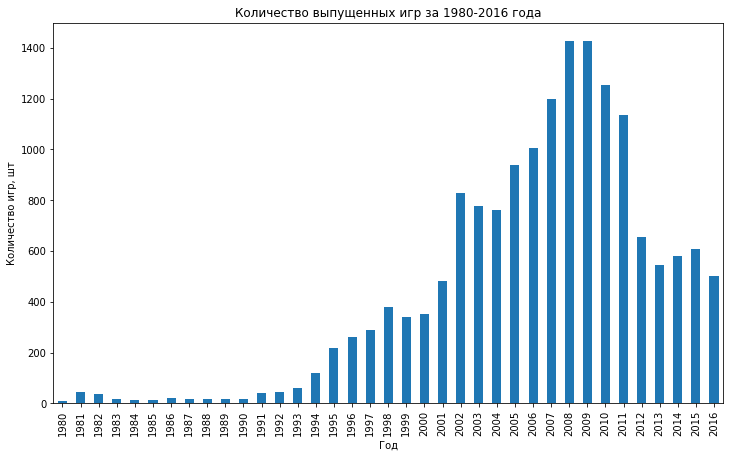

In [ ]:
#построим столбчатую диаграмму с количеством вышедших за каждый год игр
data.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(12, 7))
plt.title('Количество выпущенных игр за 1980-2016 года')
plt.xlabel('Год')
plt.ylabel('Количество игр, шт')
plt.show()

Как можно заметить, до начала 2000-х выходило небольшое количество игр. Более старые данные не так актуальны для нашего исследования, так как их мало и они не очень показательные.

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [ ]:
#найдём 5 платформ с наибольшими суммарными продажам
data.pivot_table(index='platform', values= 'total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).head()

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


In [ ]:
#создадим сводную таблицу с суммарными продажами за каждый год этих 5 платформ
platforms = data.query('platform == ["PS2", "X360", "PS3", "Wii", "DS"]').pivot_table(
    index=['platform', 'year_of_release'], values= 'total_sales', aggfunc='sum'
)
platforms.reset_index(inplace=True , level = ['platform', 'year_of_release'])
platforms

,platform,year_of_release,total_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94
5,DS,2008,145.31
6,DS,2009,119.54
7,DS,2010,85.02
8,DS,2011,26.18
9,DS,2012,11.01


Платформа DS была выпущена в 2004 году. Удалим аномалию:

In [ ]:
platforms = platforms.drop(index=[0])

Построим круговые диаграммы распределения суммарных продаж по годам для этих платформ:

Распределение суммарных продаж по годам для платформ с наибольшими суммарными продажами


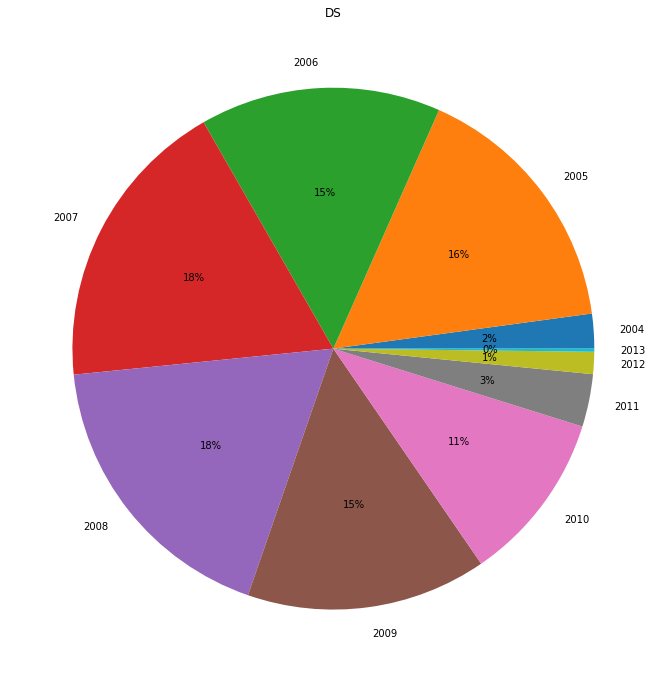

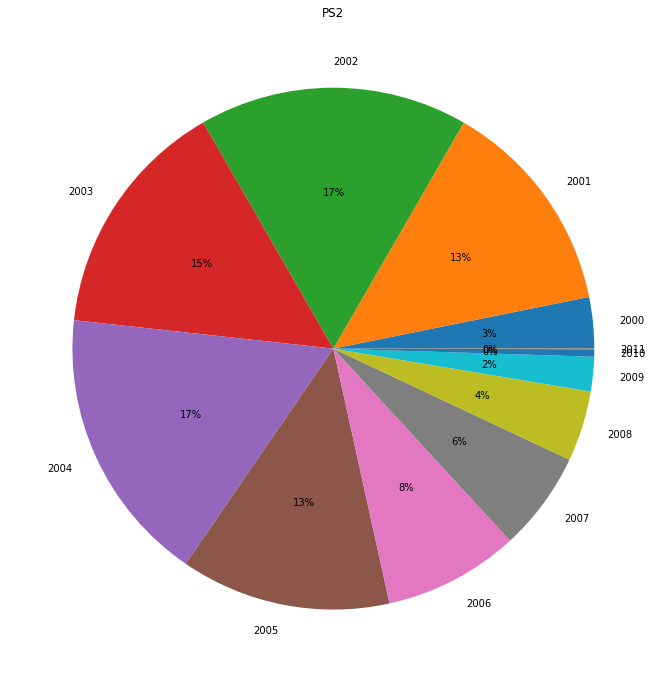

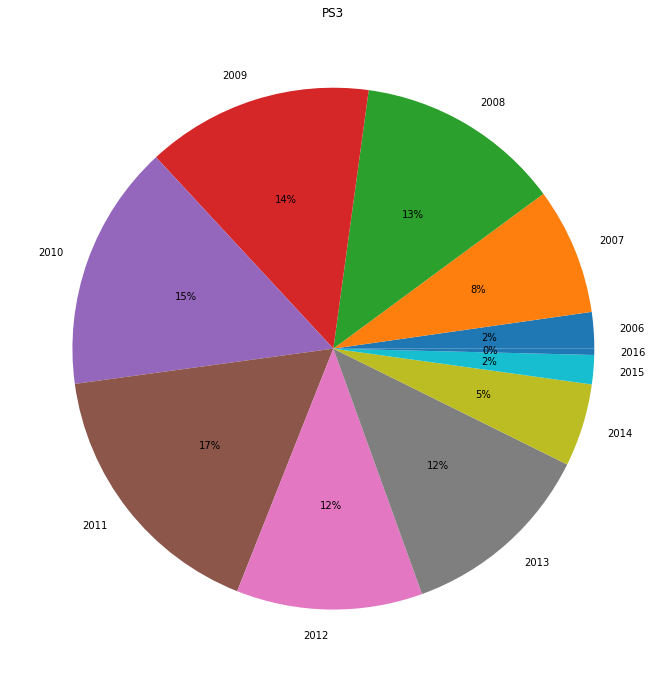

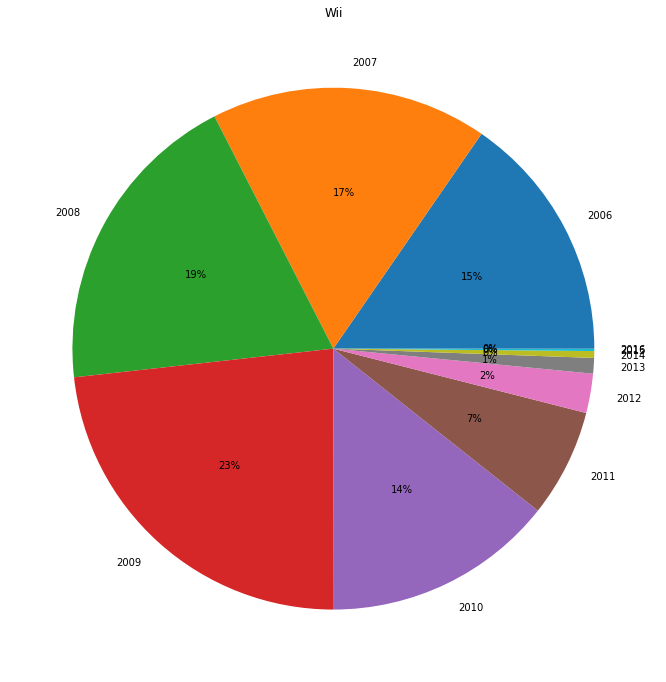

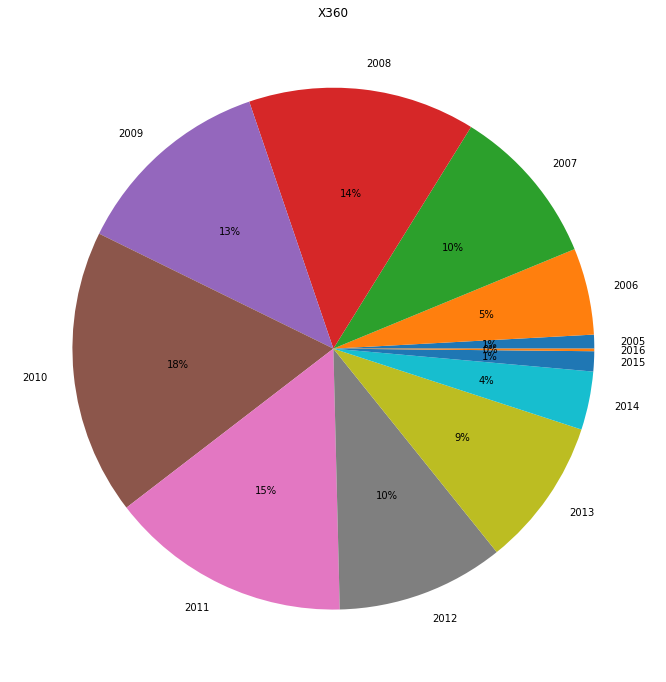

In [ ]:
print('Распределение суммарных продаж по годам для платформ с наибольшими суммарными продажами')

plt.figure(figsize=(12, 12))
plt.pie(platforms.query('platform == "DS"')['total_sales'],
        labels=platforms.query('platform == "DS"')['year_of_release'],
        autopct='%.0f%%')
plt.title('DS')
plt.show()

plt.figure(figsize=(12, 12))
plt.pie(platforms.query('platform == "PS2"')['total_sales'],
        labels=platforms.query('platform == "PS2"')['year_of_release'],
        autopct='%.0f%%')
plt.title('PS2')
plt.show()

plt.figure(figsize=(12, 12))
plt.pie(platforms.query('platform == "PS3"')['total_sales'],
        labels=platforms.query('platform == "PS3"')['year_of_release'],
        autopct='%.0f%%')
plt.title('PS3')
plt.show()

plt.figure(figsize=(12, 12))
plt.pie(platforms.query('platform == "Wii"')['total_sales'],
        labels=platforms.query('platform == "Wii"')['year_of_release'],
        autopct='%.0f%%')
plt.title('Wii')
plt.show()

plt.figure(figsize=(12, 12))
plt.pie(platforms.query('platform == "X360"')['total_sales'],
        labels=platforms.query('platform == "X360"')['year_of_release'],
        autopct='%.0f%%')
plt.title('X360')
plt.show()

Заметно, что средний "срок жизни" платформы - 10 лет.

### Возьмём данные за актуальный период

Самыми актуальными будут данные за последние 3 года - так мы не захватим старые непопулярные платформы и игры и сможем более точно провести исследование.

In [ ]:
data_new = data.query('year_of_release == [2014, 2015, 2016]') #выберем данные только за 2014, 2015 и 2016 годы
data_new['year_of_release'].unique() #проверим, что мы выбрали только данные за нужный период

array([2015, 2014, 2016])

### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [ ]:
#создадим сводную таблицу с общими продажами за каждый год для каждой платформы
new_platforms = data_new.pivot_table(index=['platform', 'year_of_release'], values= 'total_sales', aggfunc='sum')
new_platforms.reset_index(inplace= True , level = ['platform', 'year_of_release'])
new_platforms

,platform,year_of_release,total_sales
0,3DS,2014,43.76
1,3DS,2015,27.78
2,3DS,2016,15.14
3,PC,2014,13.28
4,PC,2015,8.52
5,PC,2016,5.25
6,PS3,2014,47.76
7,PS3,2015,16.82
8,PS3,2016,3.60
9,PS4,2014,100.00


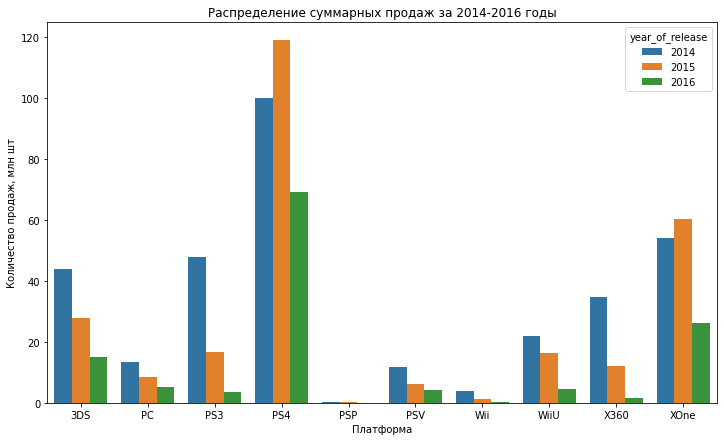

In [ ]:
#построим столбчатую диаграмму с общими продажами за каждый год для каждой платформы
plt.figure(figsize=(12, 7))
sns.barplot(data=new_platforms, x='platform', y='total_sales', hue='year_of_release')
plt.title('Распределение суммарных продаж за 2014-2016 годы')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн шт')
plt.show()

На диаграмме видно, что по продажам лидируют PS4, XOne и 3DS, хуже всего дела обстоят у Wii и PSP. Рост продаж также наблюдается платформах PS4 и XOne, в то время как на всех остальных платформах объём продаж снижается. Потенциально прибыльными платформами можно считать PS4, XOne и 3DS. Также наряду с ними стоит рассматривать PC, так как этой платформой стабильно пользуются уже на протяжении более чем 30 лет.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

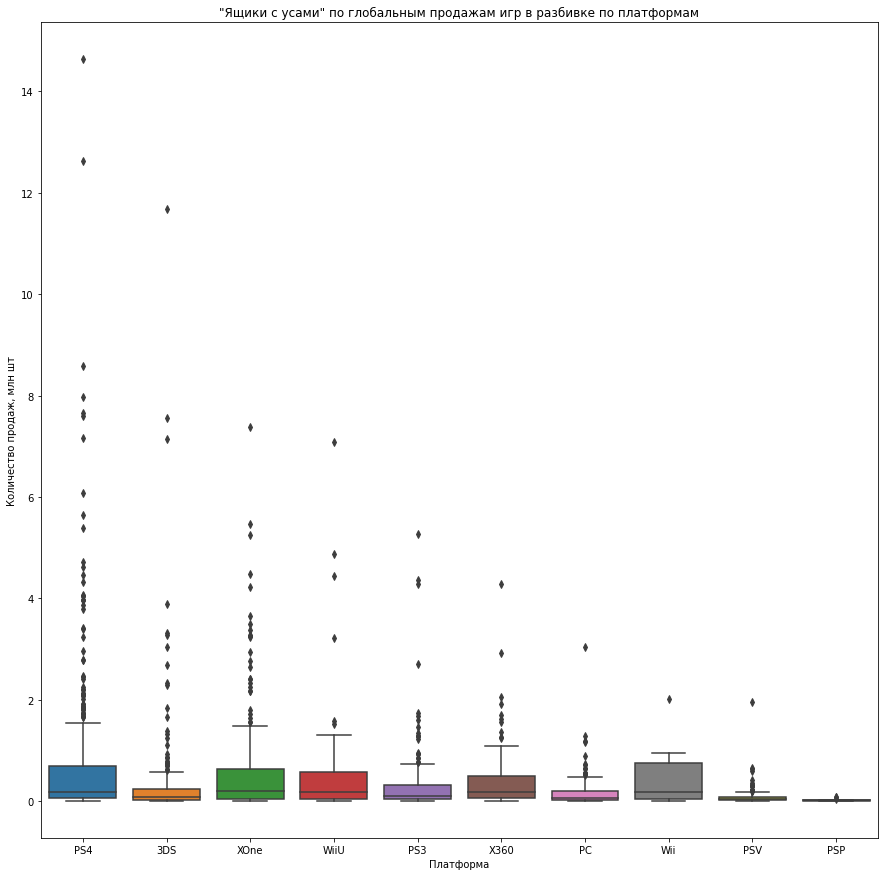

In [ ]:
#построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(15, 15))
sns.boxplot(data=data_new, x="platform", y="total_sales")
plt.title('"Ящики с усами" по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн шт')
plt.show()

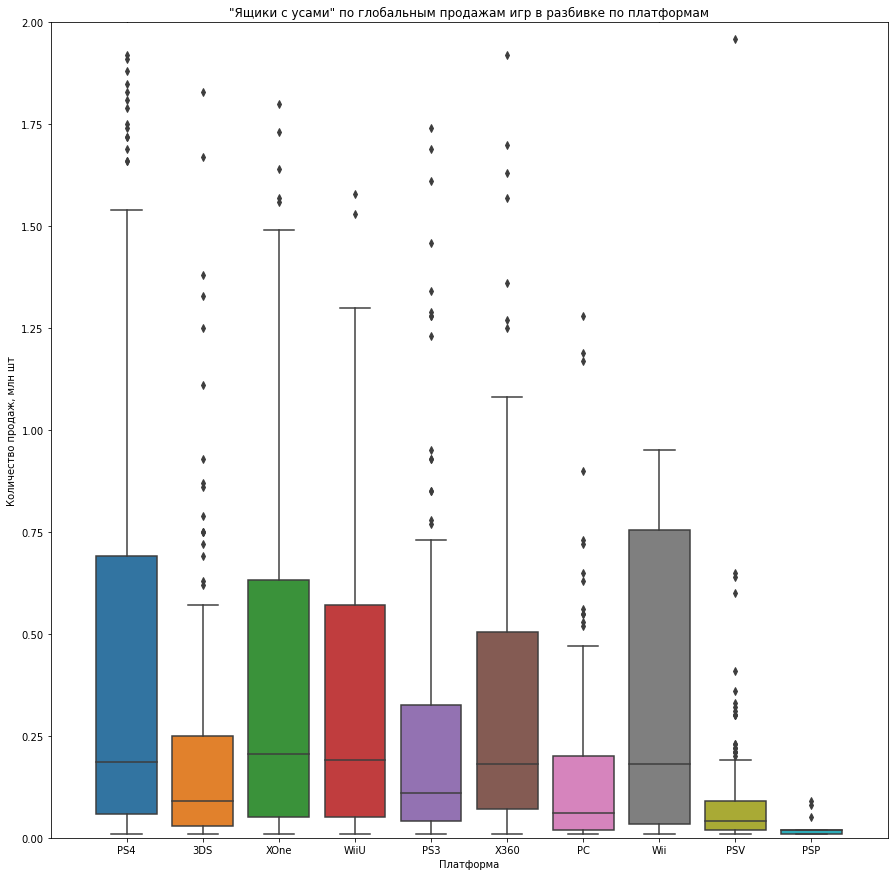

In [ ]:
#построим тот же самый график, но увеличим масштаб, чтобы лучше рассмотреть "ящики"
plt.figure(figsize=(15, 15))
sns.boxplot(data=data_new, x="platform", y="total_sales")
plt.title('"Ящики с усами" по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн шт')
plt.axis([-1, 10, 0, 2])
plt.show()

Также воспользуемся методом describe() для каждой платформы, чтоы узнать точные значения:

In [ ]:
data_new.query('platform == "PS4"')['total_sales'].describe()

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: total_sales, dtype: float64

In [ ]:
data_new.query('platform == "3DS"')['total_sales'].describe()

count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: total_sales, dtype: float64

In [ ]:
data_new.query('platform == "XOne"')['total_sales'].describe()

count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: total_sales, dtype: float64

In [ ]:
data_new.query('platform == "WiiU"')['total_sales'].describe()

count    73.000000
mean      0.588767
std       1.161467
min       0.010000
25%       0.050000
50%       0.190000
75%       0.570000
max       7.090000
Name: total_sales, dtype: float64

In [ ]:
data_new.query('platform == "PS3"')['total_sales'].describe()

count    219.000000
mean       0.311324
std        0.633059
min        0.010000
25%        0.040000
50%        0.110000
75%        0.325000
max        5.270000
Name: total_sales, dtype: float64

In [ ]:
data_new.query('platform == "X360"')['total_sales'].describe()

count    111.000000
mean       0.434414
std        0.628967
min        0.010000
25%        0.070000
50%        0.180000
75%        0.505000
max        4.280000
Name: total_sales, dtype: float64

In [ ]:
data_new.query('platform == "PC"')['total_sales'].describe()

count    151.000000
mean       0.179139
std        0.329359
min        0.010000
25%        0.020000
50%        0.060000
75%        0.200000
max        3.050000
Name: total_sales, dtype: float64

In [ ]:
data_new.query('platform == "Wii"')['total_sales'].describe()

count    11.000000
mean      0.460909
std       0.625451
min       0.010000
25%       0.035000
50%       0.180000
75%       0.755000
max       2.010000
Name: total_sales, dtype: float64

In [ ]:
data_new.query('platform == "PSV"')['total_sales'].describe()

count    295.000000
mean       0.075932
std        0.141591
min        0.010000
25%        0.020000
50%        0.040000
75%        0.090000
max        1.960000
Name: total_sales, dtype: float64

In [ ]:
data_new.query('platform == "PSP"')['total_sales'].describe()

count    13.000000
mean      0.027692
std       0.027735
min       0.010000
25%       0.010000
50%       0.020000
75%       0.020000
max       0.090000
Name: total_sales, dtype: float64

У половины платформ, в том числе потенциально прибыльных PS4 и XOne, медианное значение количества продаж находится в районе 0,18-0,2 млн штук, однако у PS4 и XOne самые большие "ящики". Также заметно, что у PC и PSV медиана количества продаж гораздо ниже - 0,06 и 0,04 млн соответственно. У потенциально прибыльных PS4 и XOne самые длинные "усы", что говорит о том, что на этих платформах наибольшие пределы нормальных значений количества продаж. Также у PS4, XOne и 3DS наибольшее количество выбросов - то есть игр, принёсших максимальную прибыли. Показатели для таких платформ, как PSP, Wii и WiiU не совсем показательные, так игр на этих платформах было выпущено 13, 11 и 73 штуки соответственно.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Рассмотрим платформу PS4:

In [ ]:
ps4 = data_new.query('platform == "PS4"') #выберем из data_new только строки с играми на PS4

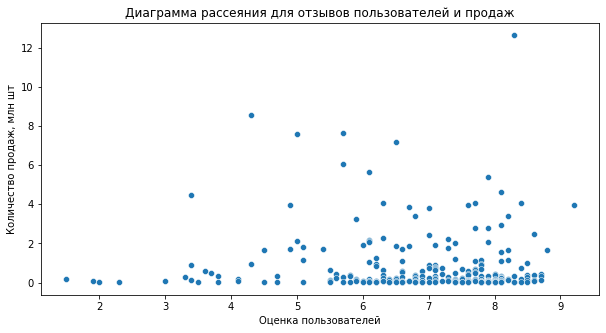

Корреляция между оценкой пользователей и количеством продаж: -0.04


In [ ]:
#построим диаграмму рассеяния для отзывов пользователей и продаж
plt.figure(figsize=(10, 5))
sns.scatterplot(data=ps4, x="user_score", y="total_sales")
plt.title('Диаграмма рассеяния для отзывов пользователей и продаж')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж, млн шт')
plt.show()

#и посмотрим на значение корреляции
print('Корреляция между оценкой пользователей и количеством продаж:',
      round(ps4['user_score'].corr(ps4['total_sales']), 2))

Нельзя сказать, что существует корреляция между оценкой пользователей и количеством продаж.

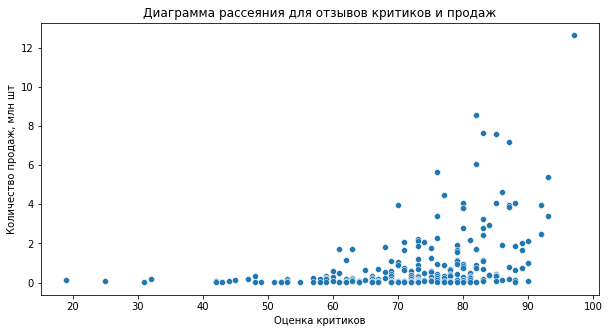

Корреляция между оценкой критиков и количеством продаж: 0.4


In [ ]:
#теперь построим диаграмму рассеяния для отзывов критиков и продаж
plt.figure(figsize=(10, 5))
sns.scatterplot(data=ps4, x="critic_score", y="total_sales")
plt.title('Диаграмма рассеяния для отзывов критиков и продаж')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж, млн шт')
plt.show()

#и посмотрим на значение корреляции
print('Корреляция между оценкой критиков и количеством продаж:',
      round(ps4['critic_score'].corr(ps4['total_sales']), 2))

А вот между оценкой критиков и количеством продаж существует слабая положительная корреляция: чем выше оценка критиков, тем больше продаж - но так бывает не всегда.

#### Сравним с продажами игр на других платформах

Проверим те же параметры для PS3:

In [ ]:
ps3 = data_new.query('platform == "PS3"') #выберем из data_new только строки с играми на PS3

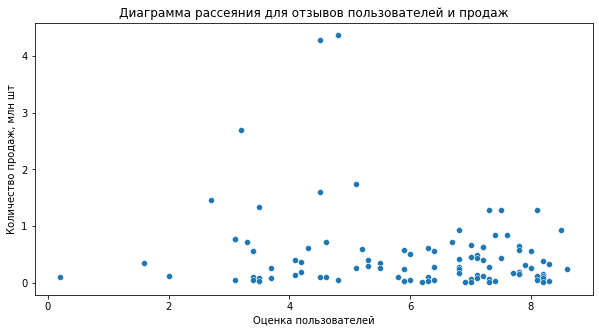

Корреляция между оценкой пользователей и количеством продаж: -0.17


In [ ]:
#построим диаграмму рассеяния для отзывов пользователей и продаж
plt.figure(figsize=(10, 5))
sns.scatterplot(data=ps3, x="user_score", y="total_sales")
plt.title('Диаграмма рассеяния для отзывов пользователей и продаж')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж, млн шт')
plt.show()

#и посмотрим на значение корреляции
print('Корреляция между оценкой пользователей и количеством продаж:',
      round(ps3['user_score'].corr(ps3['total_sales']), 2))

Нельзя сказать, что существует корреляция между оценкой пользователей и количеством продаж.

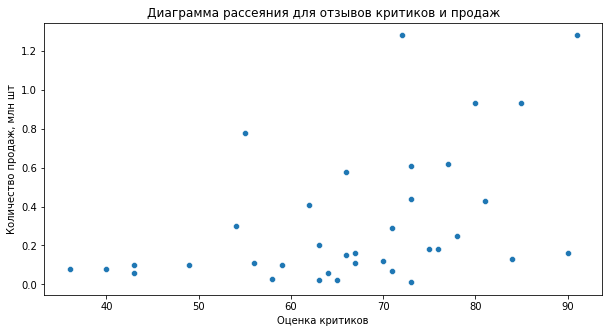

Корреляция между оценкой критиков и количеством продаж: 0.45


In [ ]:
#теперь построим диаграмму рассеяния для отзывов критиков и продаж
plt.figure(figsize=(10, 5))
sns.scatterplot(data=ps3, x="critic_score", y="total_sales")
plt.title('Диаграмма рассеяния для отзывов критиков и продаж')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж, млн шт')
plt.show()

#и посмотрим на значение корреляции
print('Корреляция между оценкой критиков и количеством продаж:',
      round(ps3['critic_score'].corr(ps3['total_sales']), 2))

Между оценкой критиков и количеством продаж существует слабая положительная корреляция: чем выше оценка критиков, тем больше продаж - но так бывает не всегда.

Также рассмотрим XOne:

In [ ]:
xo = data_new.query('platform == "XOne"') #выберем из data_new только строки с играми на XOne

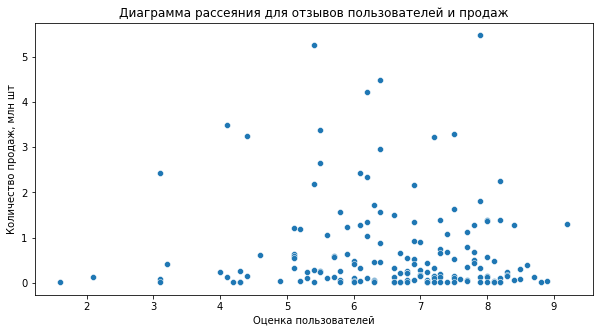

Корреляция между оценкой пользователей и количеством продаж: -0.07


In [ ]:
#построим диаграмму рассеяния для отзывов пользователей и продаж
plt.figure(figsize=(10, 5))
sns.scatterplot(data=xo, x="user_score", y="total_sales")
plt.title('Диаграмма рассеяния для отзывов пользователей и продаж')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж, млн шт')
plt.show()

#и посмотрим на значение корреляции
print('Корреляция между оценкой пользователей и количеством продаж:',
      round(xo['user_score'].corr(xo['total_sales']), 2))

Нельзя сказать, что существует корреляция между оценкой пользователей и количеством продаж.

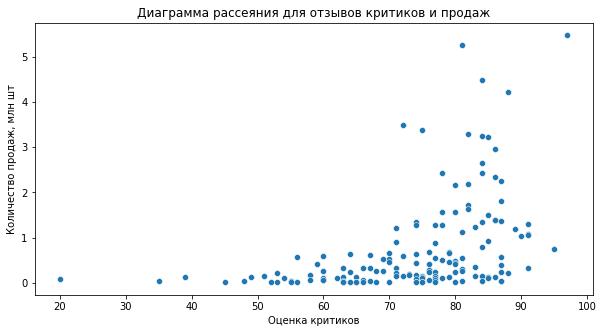

Корреляция между оценкой критиков и количеством продаж: 0.43


In [ ]:
#теперь построим диаграмму рассеяния для отзывов критиков и продаж
plt.figure(figsize=(10, 5))
sns.scatterplot(data=xo, x="critic_score", y="total_sales")
plt.title('Диаграмма рассеяния для отзывов критиков и продаж')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж, млн шт')
plt.show()

#и посмотрим на значение корреляции
print('Корреляция между оценкой критиков и количеством продаж:',
      round(xo['critic_score'].corr(xo['total_sales']), 2))

Между оценкой критиков и количеством продаж существует слабая положительная корреляция: чем выше оценка критиков, тем больше продаж - но так бывает не всегда.

Для всех трёх рассмотреных платформ корреляции получились похожими. На основании этих выводов можно предположить, что на всех остальных платформах ситуация обстоит так же: пользовательская оценка не влияет на количество продаж игр, а оценка критиков - влияет, но незначительно.

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

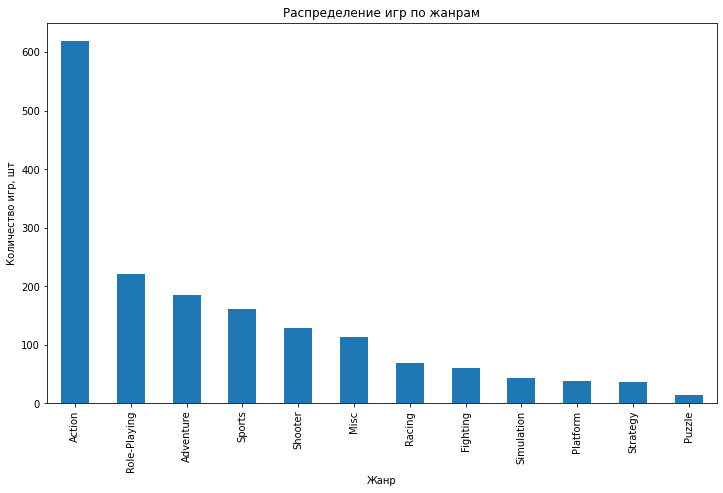

In [ ]:
#построим столбчатую диаграмму распределения игр по жанрам
plt.figure(figsize=(12, 7))
data_new['genre'].value_counts().plot(kind='bar')
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр, шт')
plt.show()

Больше всего игр в жанрах Экшн, РПГ и Приключения. Меньше всего игр в жанрах Стратегия и Головоломки.

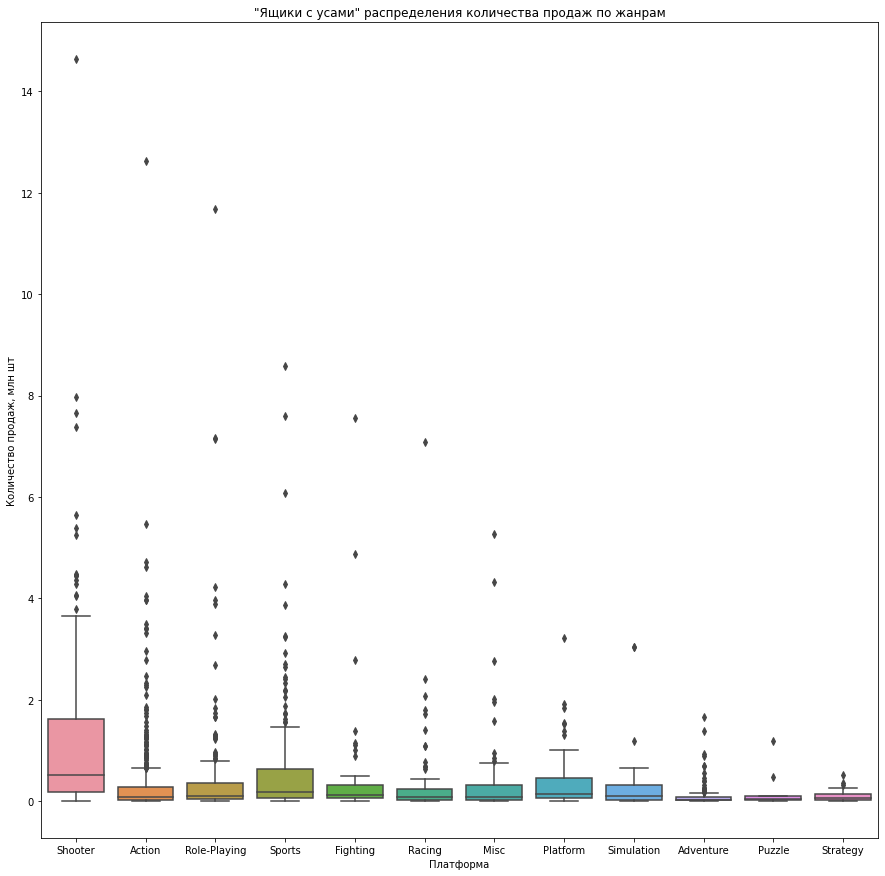

In [ ]:
#построим график «ящик с усами» распределения количества продаж по жанрам
plt.figure(figsize=(15, 15))
sns.boxplot(data=data_new, x="genre", y="total_sales")
plt.title('"Ящики с усами" распределения количества продаж по жанрам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн шт')
plt.show()

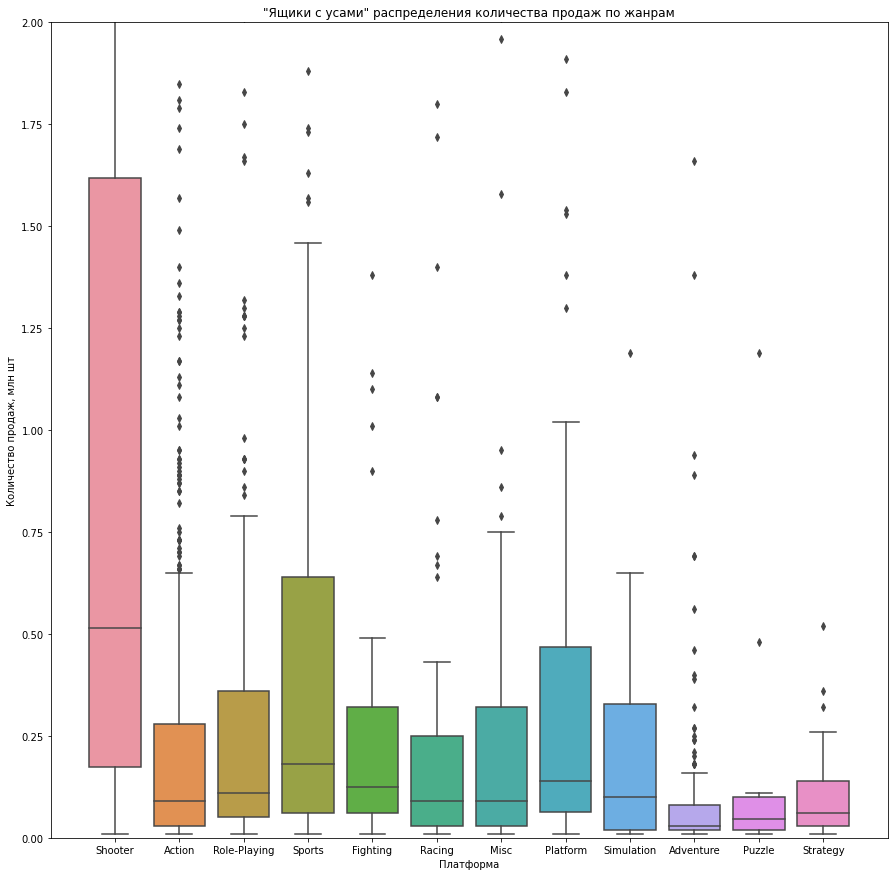

In [ ]:
#построим тот же самый график, но увеличим масштаб, чтобы лучше рассмотреть "ящики"
plt.figure(figsize=(15, 15))
sns.boxplot(data=data_new, x="genre", y="total_sales")
plt.title('"Ящики с усами" распределения количества продаж по жанрам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн шт')
plt.axis([-1, 12, 0, 2])
plt.show()

Cамое высокое медианное значение и самая большая "коробка" у жанра Шутер - это значит, что он самый стабильный в продажах из всех представленных. Наибольшее количество выбросов - игр-рекордсменов, принесших максимальный доход - наблюдается у жанров Экшн, Шутер и РПГ.

Наименьшие медиана и количество выбросов наблюдаются у жанров Приключения, Стратегия и Головоломки.

На основе этих выводов можно предположить, что наиболее перспективные жанры - Экшн и РПГ, потому что в них и выходит большое количество игр, и они часто приносят рекордный доход. Также стоит рассматривать жанр Шутер, так как он - самый стабильный в продажах.

**Вывод:** мы провели исследовательский анализ данных с помощью составления сводных таблиц, построения различных графиков и выявления корреляций и выяснили, что:
- средний "срок жизни" игровой платформы - 10 лет;
- самыми актуальными будут данные за последние 3 года - так мы не захватим старые непопулярные платформы и игры и сможем более точно провести исследование;
- по данным столбчатых диаграмм и "ящиков с усами" заметно, что по продажам лидируют платформы PS4, XOne и 3DS, хуже всего дела обстоят у Wii и PSP. Следует выбрать PS4, XOne и 3DS как потенциально прибыльные в виду их успеха, также наряду с ними стоит рассматривать PC, так как этой платформой стабильно пользуются уже на протяжении более чем 30 лет;
- пользовательская оценка не влияет на количество продаж игр, а оценка критиков - влияет, но незначительно;
- наиболее перспективные жанры - Экшн и РПГ, потому что в них и выходит большое количество игр, и они часто приносят рекордный доход. Также стоит рассматривать жанр Шутер, так как он - самый стабильный в продажах.

## Составим портрет пользователя каждого региона

Для пользователя каждого региона (NA, EU, JP) определим:


### Самые популярные платформы (топ-5).

In [ ]:
#выведем количество продаж на всех платформах в Северной Америке в виде таблицы
na = data_new.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
na.reset_index(inplace=True, level = 'platform')
#объединим продажи платформ на 6-10 месте в категорию "другие" и добавим строку с ними в получившийся датафрейм
na = na.append({'platform': 'Other', 'na_sales': na.loc[5:9, 'na_sales'].sum()}, ignore_index=True)
na = na.drop(index=[5, 6, 7, 8, 9]).reset_index(drop=True) #удалим строки с платформами на 6-10 месте
na

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,Other,31.19


In [ ]:
#выведем количество продаж на всех платформах в Европе в виде таблицы
eu = data_new.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
eu.reset_index(inplace=True, level = 'platform')
#объединим продажи платформ на 6-10 месте в категорию "другие" и добавим строку с ними в получившийся датафрейм
eu = eu.append({'platform': 'Other', 'eu_sales': eu.loc[5:9, 'eu_sales'].sum()}, ignore_index=True)
eu = eu.drop(index=[5, 6, 7, 8, 9]).reset_index(drop=True) #удалим строки с платформами на 6-10 месте
eu

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,Other,34.76


In [ ]:
#выведем количество продаж на всех платформах в Японии в виде таблицы
jp = data_new.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
jp.reset_index(inplace=True, level = 'platform')
#объединим продажи платформ на 6-10 месте в категорию "другие" и добавим строку с ними в получившийся датафрейм
jp = jp.append({'platform': 'Other', 'jp_sales': jp.loc[5:9, 'jp_sales'].sum()}, ignore_index=True)
jp = jp.drop(index=[5, 6, 7, 8, 9]).reset_index(drop=True) #удалим строки с платформами на 6-10 месте
jp

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,Other,0.76


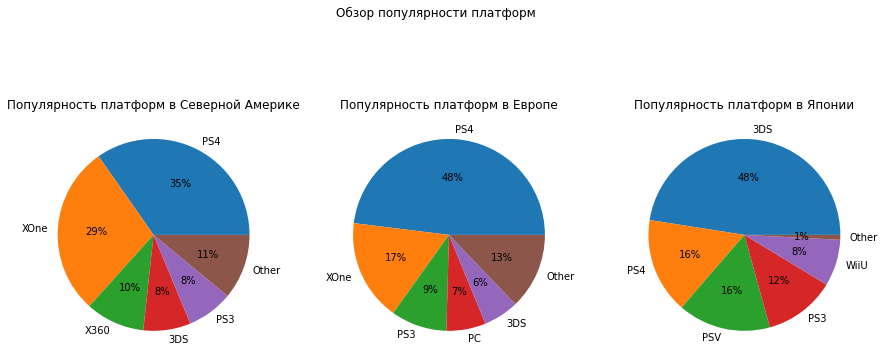

In [ ]:
#построим круговые диаграммы популярности платформ по регионам
f, ax = plt.subplots(1, 1, figsize=(15, 15))

plt.subplot(3, 3, 1)
plt.pie(na['na_sales'], labels=na['platform'], autopct='%.0f%%')
plt.title('Популярность платформ в Северной Америке')

plt.subplot(3, 3, 2)
plt.pie(eu['eu_sales'], labels=eu['platform'], autopct='%.0f%%')
plt.title('Популярность платформ в Европе')

plt.subplot(3, 3, 3)
plt.pie(jp['jp_sales'], labels=jp['platform'], autopct='%.0f%%')
plt.title('Популярность платформ в Японии')

plt.suptitle('Обзор популярности платформ')
plt.show()

В Северной Америке и Европе первая и вторая по популярности платформа - PS4 и XOne. В Японии 3DS на первом месте (предположительно из-за того, что Nintendo - это японская компания) и PS4 - на втором. Можно сказать, что PS4, XOne и 3DS - наиболее популярные среди геймеров платформы.

### Самые популярные жанры (топ-5).

In [ ]:
#выведем количество продаж во всех жанрах в Северной Америке в виде таблицы
na_genre = data_new.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales',
                                                                                             ascending=False)
na_genre.reset_index(inplace=True, level = 'genre')
#объединим продажи жанров на 6-11 месте в категорию "другие" и добавим строку с ними в получившийся датафрейм
na_genre = na_genre.append({'genre': 'Other', 'na_sales': na_genre.loc[5:11, 'na_sales'].sum()}, ignore_index=True)
#удалим строки с жанрами на 6-11 месте
na_genre = na_genre.drop(index=[5, 6, 7, 8, 9, 10, 11]).reset_index(drop=True)
na_genre

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05
5,Other,37.86


In [ ]:
#выведем количество продаж во всех жанрах в Европе в виде таблицы
eu_genre = data_new.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales',
                                                                                             ascending=False)
eu_genre.reset_index(inplace=True, level = 'genre')
#объединим продажи жанров на 6-11 месте в категорию "другие" и добавим строку с ними в получившийся датафрейм
eu_genre = eu_genre.append({'genre': 'Other', 'eu_sales': eu_genre.loc[5:11, 'eu_sales'].sum()}, ignore_index=True)
#удалим строки с жанрами на 6-11 месте
eu_genre = eu_genre.drop(index=[5, 6, 7, 8, 9, 10, 11]).reset_index(drop=True)
eu_genre

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13
5,Other,42.45


In [ ]:
#выведем количество продаж во всех жанрах в Японии в виде таблицы
jp_genre = data_new.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales',
                                                                                             ascending=False)
jp_genre.reset_index(inplace=True, level = 'genre')
#объединим продажи жанров на 6-11 месте в категорию "другие" и добавим строку с ними в получившийся датафрейм
jp_genre = jp_genre.append({'genre': 'Other', 'jp_sales': jp_genre.loc[5:11, 'jp_sales'].sum()}, ignore_index=True)
#удалим строки с жанрами на 6-11 месте
jp_genre = jp_genre.drop(index=[5, 6, 7, 8, 9, 10, 11]).reset_index(drop=True)
jp_genre

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87
5,Other,15.50


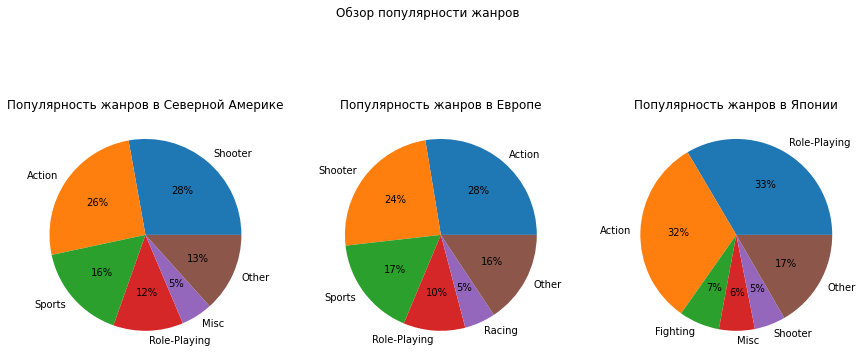

In [ ]:
#построим круговые диаграммы популярности жанров по регионам
f, ax = plt.subplots(1, 1, figsize=(15, 15))

plt.subplot(3, 3, 1)
plt.pie(na_genre['na_sales'], labels=na_genre['genre'], autopct='%.0f%%')
plt.title('Популярность жанров в Северной Америке')

plt.subplot(3, 3, 2)
plt.pie(eu_genre['eu_sales'], labels=eu_genre['genre'], autopct='%.0f%%')
plt.title('Популярность жанров в Европе')

plt.subplot(3, 3, 3)
plt.pie(jp_genre['jp_sales'], labels=jp_genre['genre'], autopct='%.0f%%')
plt.title('Популярность жанров в Японии')

plt.suptitle('Обзор популярности жанров')
plt.show()

В Северной Америке жанры Экшн и Шутер занимают 1 и 2 место, в Европе они на 2 и 1 месте соответственно. Менее популярны в этих регионах РПГ, Гонки и "другие" жанры. В Японии же РПГ занимает 1 место, Экшн - 2-е, а Шутер - 5-е. Можно предположить, что в Японии лучше всего продаются РПГ игры из-за того, что там и выпускается большое количество игр в этом жанре - например, Final Fantasy или Dragon Quest. Многие геймеры играли в эти игры и полюбили жанр РПГ. Кроме того, известный факт, что в Японии множество людей страдает от одиночества и депрессии, а жанр РПГ позволяет много общаться с персонажами, исследовать локации, выполнять миссии - в общем, чувствовать большую вовлечённость в процесс игры и получать от него большую отдачу.

Также можно сказать, что жанры Экшн, Шутер и РПГ наиболее популярны во всех регионах.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

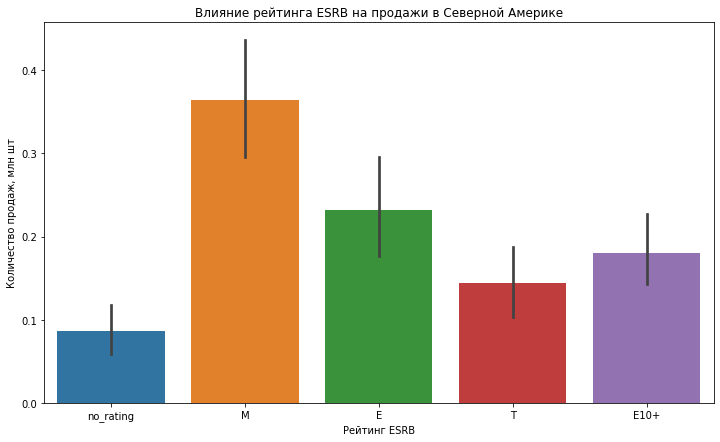

In [ ]:
#построим столбчатую диаграмму для рейтинга ESRB и продаж в Северной Америке
plt.figure(figsize=(12, 7))
sns.barplot(data=data_new, x='rating', y='na_sales')
plt.title('Влияние рейтинга ESRB на продажи в Северной Америке')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество продаж, млн шт')
plt.show()

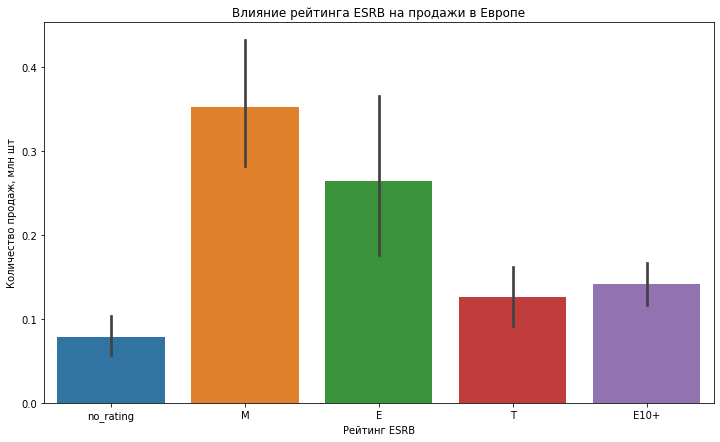

In [ ]:
#построим столбчатую диаграмму для рейтинга ESRB и продаж в Европе
plt.figure(figsize=(12, 7))
sns.barplot(data=data_new, x='rating', y='eu_sales')
plt.title('Влияние рейтинга ESRB на продажи в Европе')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество продаж, млн шт')
plt.show()

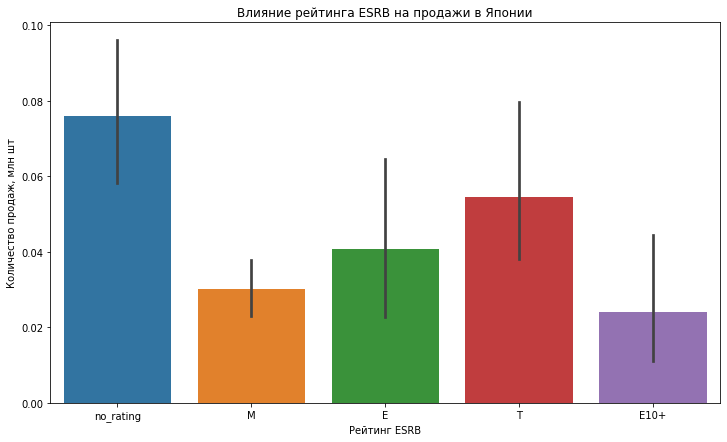

In [ ]:
#построим столбчатую диаграмму для рейтинга ESRB и продаж в Японии
plt.figure(figsize=(12, 7))
sns.barplot(data=data_new, x='rating', y='jp_sales')
plt.title('Влияние рейтинга ESRB на продажи в Японии')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество продаж, млн шт')
plt.show()

В Северной Америке и Европе больше всего игр продаётся с маркировкой M («Mature») — «Для взрослых» (то есть для лиц старше 17 лет). Для Японии вывод сделать немного сложнее, так как у большинства игр не был указан рейтинг, но вторая по популярности группа игр - с маркировкой Т («Teen») — «Подросткам» (то есть для лиц старше 13 лет). Такое распределение может быть связано с разницей в популярных жанрах - в Северной Америке и Европе наиболее популярны Экшн и Шутер, в которых непосредственно встречаются сцены насилия/жестокости, в то время как в популярном в Японии РПГ такое встречается реже.

**Вывод:** для пользователей каждого региона (Северная Америка, Европа, Япония) мы выяснили самые популярные платформы и жанры, а также узнали, влияет ли рейтинг ESRB на продажи.

Для Северной Америки и Европы самыми популярными платформами являются PS4 и XOne, самыми популярными жанрами - Экшн и Шутер, а больше всего игр продаётся с маркировкой M («Mature») — «Для взрослых».

Для Японии самыми популярными платформами являются 3DS и PS4, самыми популярными жанрами - РПГ и Экшн, а больше всего игр продаётся с маркировкой Т («Teen») — «Подросткам».

Можно сказать, что наиболее популярными платформами являются PS4, XOne и 3DS, а жанрами - Экшн, Шутер и РПГ.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезы:

H0 - Средние пользовательские рейтинги платформ Xbox One и PC равны.

H1 - Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [ ]:
xone = data_new.query('platform == "XOne"')['user_score'].dropna() #пользовательские оценки платформы Xbox One
pc = data_new.query('platform == "PC"')['user_score'].dropna() #пользовательские оценки платформы PC

alpha = 0.01 #задаём уровень статистической значимости

results = st.ttest_ind(xone, pc) #проводим ttest

print('p-значение:', results.pvalue)
print('Средний пользовательский рейтинг платформы Xbox One', round(xone.mean(), 2))
print('Средний пользовательский рейтинг платформы PC', round(pc.mean(), 2))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348415
Средний пользовательский рейтинг платформы Xbox One 6.59
Средний пользовательский рейтинг платформы PC 6.3
Не получилось отвергнуть нулевую гипотезу


P-value - это вероятность получить наблюдаемое или ещё более далёкое от предполагаемого в H0 значения при условии, что H0 верна.

Мы придерживаемся нулевой гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем гипотезы:

H0 - Средние пользовательские рейтинги жанров Экшн и Спортивные равны.

H1 - Средние пользовательские рейтинги жанров Экшн и Спортивные не равны.

In [ ]:
action = data_new.query('genre == "Action"')['user_score'].dropna() #пользовательские оценки жанра Экшн
sports = data_new.query('genre == "Sports"')['user_score'].dropna() #пользовательские оценки жанра Спортивные

alpha = 0.01 #задаём уровень статистической значимости

results = st.ttest_ind(action, sports) #проводим ttest

print('p-значение:', results.pvalue)
print('Средний пользовательский рейтинг жанра Экшн', round(action.mean(), 2))
print('Средний пользовательский рейтинг жанра Спортивные', round(sports.mean(), 2))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Средний пользовательский рейтинг жанра Экшн 6.76
Средний пользовательский рейтинг жанра Спортивные 5.23
Отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу в пользу альтернативной: средние пользовательские рейтинги жанров Экшн и Спортивные разные. Как мы видим, средний рейтинг жанра Экшн больше.

**Вывод:** мы проверили две пары гипотез. Мы формулировали двусторонние гипотезы, то есть нулевая гипотеза со знаком равенства, а альтернативная - со знаком неравенства, потому что нам важно было проверить именно факт равенства или неравенства. Для проверки гипотез мы выбрали метод st.ttest_ind(), так как в обоих случаях мы сравнивали средние двух генеральных совокупностей (независимых).

Мы выяснили, что:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Экшн и Спортивные разные - средний рейтинг жанра Экшн больше.

## Вывод

Мы провели исследование на основе данных об играх из открытых источников для интернет-магазина «Стримчик».

Мы провели предобработку данных: привели к нижнему регистру названия столбцов; обработали пропуски, где это было возможно; объединили две группы рейтингов организации ESRB; заменили тип данных в некоторых столбцах для удобства работы; устранили неявный дубликат; создали новый столбец с суммарными продажами игр во всех регионах.

Мы провели исследовательский анализ - построили ряд графиков и изучили ряд сводных таблиц - и на их основе сделали следующие **выводы**:
1) Средний "срок жизни" игровой платформы - 10 лет.

2) Мы взяли актуальные данные за последние 3 года - так мы не захватили старые непопулярные платформы и игры и смогли более точно провести исследование.

3) По данным столбчатых диаграмм и "ящиков с усами" мы заметили, что по продажам лидируют платформы PS4, XOne и 3DS, хуже всего дела обстоят у Wii и PSP. Следует выбрать PS4, XOne и 3DS как потенциально прибыльные в виду их успеха, также наряду с ними стоит рассматривать PC, так как этой платформой стабильно пользуются уже на протяжении более чем 30 лет.

4) Пользовательская оценка не влияет на количество продаж игр, а оценка критиков - влияет, но незначительно.

5) Наиболее перспективные жанры - Экшн и РПГ, потому что в них и выходит большое количество игр, и они часто приносят рекордный доход. Также стоит рассматривать жанр Шутер, так как он - самый стабильный в продажах.

Мы составили портрет пользователя каждого представленного в датафрейме региона (Северная Америка, Европа, Япония) и сделали следующие **выводы**:
- Для Северной Америки и Европы самыми популярными платформами являются PS4 и XOne, самыми популярными жанрами - Экшн и Шутер, а больше всего игр продаётся с маркировкой M («Mature») — «Для взрослых».

- Для Японии самыми популярными платформами являются 3DS и PS4, самыми популярными жанрами - РПГ и Экшн, а больше всего игр продаётся с маркировкой Т («Teen») — «Подросткам».

Можно сказать, что наиболее популярными платформами являются PS4, XOne и 3DS, а жанрами - Экшн, Шутер и РПГ.

Мы также проверили несколько гипотез и **выяснили**, что:
1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

2) Средние пользовательские рейтинги жанров Экшн и Спортивные разные - средний рейтинг жанра Экшн больше.

В целом, можно сказать, что по всем изученным параметрам наиболее перспективными платформами являются PS4, XOne и 3DS, а наиболее перспективными жанрами - Экшн, Шутер и РПГ.

**Рекомендация для магазина:** делать ставку на рекламные кампании для платформ PS4, XOne и 3DS и игр в жанре Экшн, Шутер и РПГ.